In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import swifter
from IPython.core.display import HTML

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

# The Data Information (from Kaggle, https://www.kaggle.com/sobhanmoosavi/us-accidents)

## <i>"This is a countrywide car accident dataset, which covers 49 states of the United States. The data is collected from February 2016 to December 2019, using several data providers, including two APIs that provide streaming traffic incident data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.0 million accident records in this dataset. Check here to learn more about this dataset."</i>

In [2]:
df = pd.read_csv('US_Accidents_Dec19.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


## Seeing the first 5 rows of the data with null values, knowing how much null values is essential. It is also noticable that there are 49columns/features in the dataset, dropping some of these features maybe beneficial for certain use of the dataset. 

## For the puspose of showcasing foundation skills, the dataset will be used to create descriptive analysis - getting insights on based on the data.

In [3]:
df.isna().mean()# counting and showing percentage all of null values in each feature of the dataset

ID                       0.000000e+00
Source                   0.000000e+00
TMC                      2.447845e-01
Severity                 0.000000e+00
Start_Time               0.000000e+00
End_Time                 0.000000e+00
Start_Lat                0.000000e+00
Start_Lng                0.000000e+00
End_Lat                  7.552155e-01
End_Lng                  7.552155e-01
Distance(mi)             0.000000e+00
Description              3.362096e-07
Number                   6.447172e-01
Street                   0.000000e+00
Side                     0.000000e+00
City                     2.790540e-05
County                   0.000000e+00
State                    0.000000e+00
Zipcode                  2.958645e-04
Country                  0.000000e+00
Timezone                 1.063431e-03
Airport_Code             1.913369e-03
Weather_Timestamp        1.234057e-02
Temperature(F)           1.884892e-02
Wind_Chill(F)            6.228696e-01
Humidity(%)              1.989453e-02
Pressure(in)

## From the results above, we can see that there are features with null value count close to 80%. Hence, it won't be beneficial to fill/clean the dataset with this much missing information. It may create bias in the data and the proceeding analysis. Therefor, dropping the features with greater than 60% (arbitrary number, assuming that all features are and would be normally distributed) would be feasible. It would not not create a false mean should we fill the null values nor create bias.

In [4]:
for x in df: # looping through all the dataframe features
    if df[x].isna().mean()>=.4: # conditional filter as stated above
        df.drop(x, axis = 1, inplace = True) # dropping the feature that fits the condition
df.dropna(inplace = True) #dropping entries with null values

In [5]:
df.isna().mean()

ID                       0.0
Source                   0.0
TMC                      0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
Side                     0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit                  0.0
Railway                  0.0
Roundabout    

In [6]:
df = df.reset_index()
display(HTML(df.head(10).to_html()))

,index,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
1,3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,5,A-6,MapQuest,201.0,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.01,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 07:51:00,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,6,A-7,MapQuest,201.0,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.00,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,Montgomery,OH,45417-2476,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,7,A-8,MapQuest,201.0,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,0.01,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,Dayton,Montgomery,OH,45405,US,US/Eastern,KDAY,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,8,A-9,MapQuest,201.0,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,0.00,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,Dayton,Montgomery,OH,45404-1923,US,US/Eastern,KFFO,2016-02-08 07:58:00,33.3,99.0,29.67,5.0,SW,1.2,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,9,A-10,MapQuest,201.0,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,0.01,Right hand shoulder blocked due to accident on...,Westerville Rd,R,Westerville,Franklin,OH,43081,US,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,10,A-11,MapQuest,201.0,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,0.01,Accident on I-270 Outerbelt Northbound at Exit...,Outerbelt S,R,Columbus,Franklin,OH,43228,US,US/Eastern,KTZR,2016-02-08 07:50:00,35.6,93.0,29.64,5.0,WNW,5.8,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,11,A-12,MapQuest,241.0,3,2016-02-08 08:21:27,2016-02-08 08:51:27,39.932709,-82.830910,0.01,One lane blocked due to accident on I-70 Westb...,I-70 E,R,Reynoldsburg,Franklin,OH,43068,US,US/Eastern,KCMH,2016-02-08 08:28:00,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,False,False,False,False,Tr

In [7]:
df.columns

Index(['index', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Description', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

## From the column names, we can find irrelevant features for descriptive analysis; since the goal is to create a descriptive analysis and not geomapping/locating, we can remove 'Start_Lat' , 'Start_Lng', 'Zipcode', 'Distance(mi)', 'Country',  'Airport_Code', and 'Timezone' from the dataset. We can also drop the ID, Source and TMC (Traffic Message Code) since these are usable for investigating each event and not as a whole dataset. 

In [8]:
to_drop = ['ID', 'Source', 'TMC','Start_Lat', 'Start_Lng', 'Distance(mi)','Country','Zipcode','Airport_Code','Timezone']
df.drop(to_drop, axis = 1, inplace=True)

display(HTML(df.head(10).to_html()))

,index,Severity,Start_Time,End_Time,Description,Street,Side,City,County,State,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,R,Williamsburg,Clermont,OH,2016-02-08 06:56:00,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
1,3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,R,Dayton,Montgomery,OH,2016-02-08 07:38:00,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2,4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,2016-02-08 07:53:00,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3,5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,R,Westerville,Franklin,OH,2016-02-08 07:51:00,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,R,Dayton,Montgomery,OH,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
5,7,3,2016-02-08 07:59:58,2016-02-08 08:29:58,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,R,Dayton,Montgomery,OH,2016-02-08 07:56:00,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
6,8,2,2016-02-08 08:00:40,2016-02-08 08:30:40,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,L,Dayton,Montgomery,OH,2016-02-08 07:58:00,33.3,99.0,29.67,5.0,SW,1.2,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7,9,3,2016-02-08 08:10:04,2016-02-08 08:40:04,Right hand shoulder blocked due to accident on...,Westerville Rd,R,Westerville,Franklin,OH,2016-02-08 08:28:00,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
8,10,3,2016-02-08 08:14:42,2016-02-08 08:44:42,Accident on I-270 Outerbelt Northbound at Exit...,Outerbelt S,R,Columbus,Franklin,OH,2016-02-08 07:50:00,35.6,93.0,29.64,5.0,WNW,5.8,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
9,11,3,2016-02-08 08:21:27,2016-02-08 08:51:27,One lane blocked due to accident on I-70 Westb...,I-70 E,R,Reynoldsburg,Franklin,OH,2016-02-08 08:28:00,37.4,100.0,29.62,3.0,SSW,4.6,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886978 entries, 0 to 1886977
Data columns (total 35 columns):
index                    int64
Severity                 int64
Start_Time               object
End_Time                 object
Description              object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Weather_Timestamp        object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mph)          float64
Weather_Condition        object
Amenity                  bool
Bump                     bool
Crossing                 bool
Give_Way                 bool
Junction                 bool
No_Exit                  bool
Railway                  bool
Roundabout               bool
Station                  bool
Stop                     bool
Traffic_

# From the information provided above, we can identify the quantitative, DateTime, and categorical features. Hence, we will proceed with creating dummy variables and converting to DateTime.

In [10]:
# Converting to DateTime
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [11]:
# Creating Time Delta from start to end of accident in seconds
df['Time_Delta'] = df['End_Time'] - df['Start_Time']

In [12]:
# Converting Boolean values to numerical
booleans = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout',
            'Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']
for x in booleans:
    df[x] = np.where(df[x] == True, 1,0) #if value is True --> 1, if False-->0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1886978 entries, 0 to 1886977
Data columns (total 36 columns):
index                    int64
Severity                 int64
Start_Time               datetime64[ns]
End_Time                 datetime64[ns]
Description              object
Street                   object
Side                     object
City                     object
County                   object
State                    object
Weather_Timestamp        object
Temperature(F)           float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction           object
Wind_Speed(mph)          float64
Weather_Condition        object
Amenity                  int64
Bump                     int64
Crossing                 int64
Give_Way                 int64
Junction                 int64
No_Exit                  int64
Railway                  int64
Roundabout               int64
Station                  int64
Stop         

In [14]:
# Checking for the object type features left
obj = ['Description','Street','Side','City','County','State','Weather_Timestamp','Wind_Direction',
       'Weather_Condition','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
for x in obj:
    print('')
    print(df[x].value_counts().head(60))
    print('')
    print('-------------------------------------------------------------')


Accident on I-85 Southbound at Exit 54 Pelham Rd.                                       301
Accident on I-85 Northbound at Exit 54 Pelham Rd.                                       206
Accident on I-85 Southbound at Exit 51 I-385.                                           166
Accident on I-10 Westbound at Exit 158 College Dr.                                      149
Accident on I-85 Northbound at Exit 51 I-385.                                           130
Accident on I-94 Eastbound at Exit 233B MN-65.                                          128
Accident on I-20 Eastbound at Exit 58 US-1 Augusta Rd.                                  121
Accident on I-20 Westbound at Exit 65 US-176 Broad River Rd.                            116
Accident on US-1 Capital Blvd at Old Wake Forest Rd.                                    115
Accident on I-80 Westbound at Exits 8A 8B I-880.                                        113
Accident on I-10 Eastbound at Exit 158 College Dr.                             

Los Angeles         107406
Harris               73253
Dallas               51522
Travis               51440
Mecklenburg          50598
Orange               44191
Wake                 41376
Montgomery           40756
Davidson             29704
Maricopa             29095
Oklahoma             28710
East Baton Rouge     28107
Alameda              26312
Miami-Dade           25544
Genesee              24599
King                 23161
San Diego            22589
Fulton               21927
Sacramento           20758
Greenville           19111
Bexar                18867
Santa Clara          18043
Jefferson            17714
Douglas              17696
Hennepin             17190
Riverside            16499
San Bernardino       16455
Marion               16445
Wayne                15883
Cook                 14090
Monroe               13958
Westchester          13743
Tulsa                13422
Contra Costa         13338
Richland             13158
Broward              12799
Suffolk              12532
D

In [15]:
a = 'abcdef'
a[0:5]

'abcde'

In [16]:
binaries = ['Side', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
for x in binaries:
    dummy = pd.get_dummies(df[x],prefix = x[0:5]) # creating dummies for each binary categorical dummies
    df = pd.concat([df,dummy],axis = 1) # concatinating the dummy created and the dataframe
df.drop(binaries, axis = 1, inplace = True) # dropping original features
df.head(10)


,index,Severity,Start_Time,End_Time,Description,Street,City,County,State,Weather_Timestamp,...,Side_L,Side_R,Sunri_Day,Sunri_Night,Civil_Day,Civil_Night,Nauti_Day,Nauti_Night,Astro_Day,Astro_Night
0,2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,2016-02-08 06:56:00,...,0,1,0,1,0,1,1,0,1,0
1,3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,2016-02-08 07:38:00,...,0,1,0,1,1,0,1,0,1,0
2,4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,2016-02-08 07:53:00,...,0,1,1,0,1,0,1,0,1,0
3,5,3,2016-02-08 07:44:26,2016-02-08 08:14:26,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,OH,2016-02-08 07:51:00,...,0,1,1,0,1,0,1,0,1,0
4,6,2,2016-02-08 07:59:35,2016-02-08 08:29:35,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,OH,2016-02-08 07:56:00,...,0,1,1,0,1,0,1,0,1,0
5,7,3,2016-02-08 07:59:58,2016-02-08 08:29:58,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,Dayton,Montgomery,OH,2016-02-08 07:56:00,...,0,1,1,0,1,0,1,0,1,0
6,8,2,2016-02-08 08:00:40,2016-02-08 08:30:40,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,Dayton,Montgomery,OH,2016-02-08 07:58:00,...,1,0,1,0,1,0,1,0,1,0
7,9,3,2016-02-08 08:10:04,2016-02-08 08:40:04,Right hand shoulder blocked due to accident on...,Westerville Rd,Westerville,Franklin,OH,2016-02-08 08:28:00,...,0,1,1,0,1,0,1,0,1,0
8,10,3,2016-02-08 08:14:42,2016-02-08 08:44:42,Accident on I-270 Outerbelt Northbound at Exit...,Outerbelt S,Columbus,Franklin,OH,2016-02-08 07:50:00,...,0,1,1,0,1,0,1,0,1,0
9,11,3,2016-02-08 08:21:27,2016-02-08 08:51:27,One lane blocked due to accident on I-70 Westb...,I-70 E,Reynoldsburg,Franklin,OH,2016-02-08 08:28:00,...,0,1,1,0,1,0,1,0,1,0


# Visualization

## Accident Duration Effect

In [17]:
df.Time_Delta = df.Time_Delta.swifter.apply(lambda x: x.seconds/60)
df.Time_Delta.describe()

count    1.886978e+06
mean     4.932718e+01
std      3.466056e+01
min      0.000000e+00
25%      2.970000e+01
50%      4.416667e+01
75%      5.965000e+01
max      1.439733e+03
Name: Time_Delta, dtype: float64

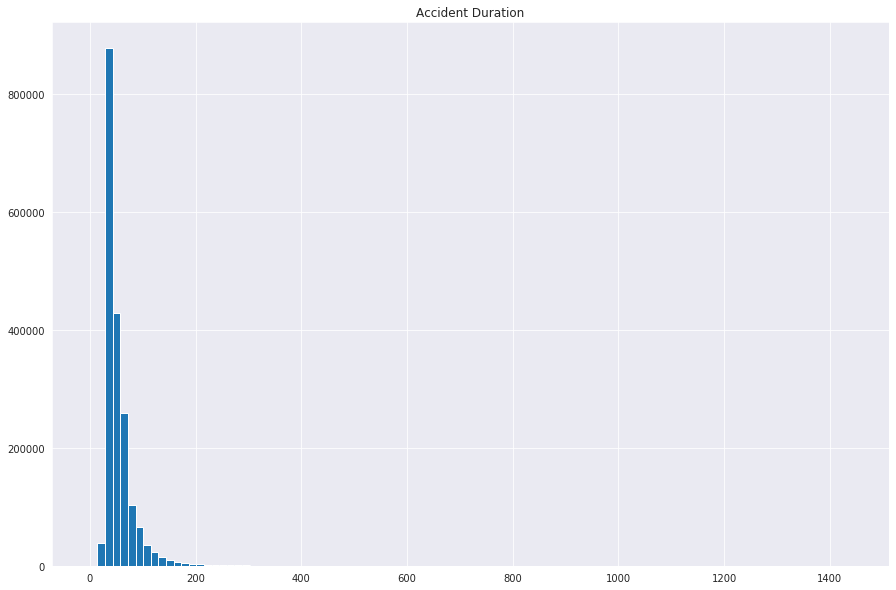

In [18]:
plt.figure(figsize=(15,10), facecolor = 'w')
plt.hist(df.Time_Delta, bins = 100)
plt.title('Accident Duration')
plt.show()

## From the plot above, we can see there are mutliple peaks of duration of the accident but mostly peaked at increment of 15 minutes starting at 30. Hence, we can infer that most accidents that occured in the US mostly last at least 30 minutes and worst case scenarios of lasting for 24 hours.

## Severity by State

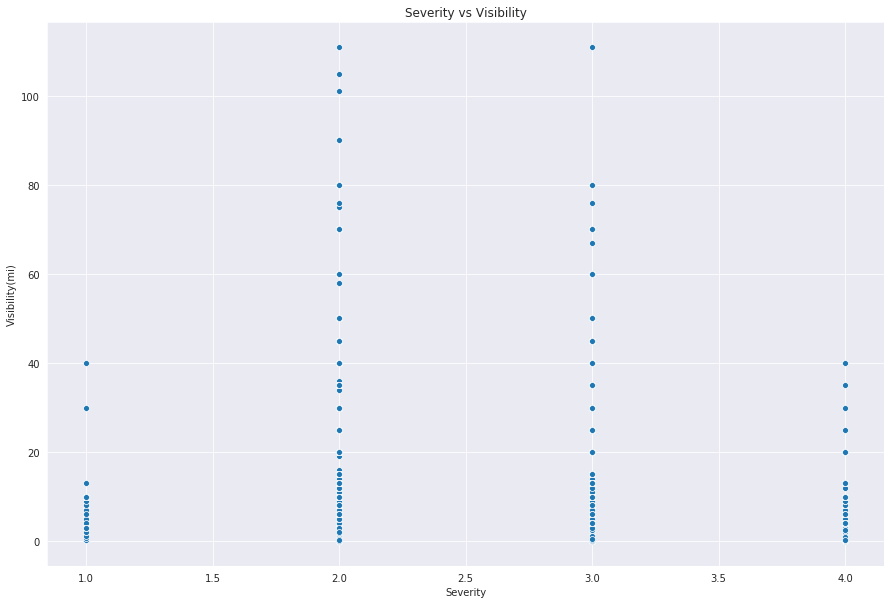

In [19]:
plt.figure(figsize=(15,10), facecolor = 'w')
sns.scatterplot(x = 'Severity',y = 'Visibility(mi)', data = df)
plt.title('Severity vs Visibility')
plt.show()


## From the chart above, we can infer that there is barely any correlation between visibility and severity. However, we can identify  that  most of the accidents might be caused be low visibility of 20 miles or less since there are more points shown below the 20 mile visibility line.